<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=25>
        نمونه‌برداری
    </font>
</div>

<div style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=3>
در این سوال قصد داریم الگوریتم‌های مختلف نمونه‌برداری را پیاده‌سازی کنیم. هدف اصلی مقایسه‌ی حاصل این نمونه‌برداری‌ها با نقاط توزیع اصلی است. 
    </font>
</div>

In [1]:
import numpy as np

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
در مرحله‌ی اول مجموعه‌ داده‌های مورد نیاز را برای نمونه‌برداری پیاده‌سازی می‌کنیم. در این قسمت از معادلات گوسی دوبعدی استفاده خواهیم کرد که از معادلات زیر استفاده می‌کند.
    </font>
    </div>

\begin{equation}
p
(
a
,
b
)
=
N
(
\begin{bmatrix}
a \\ b
\end{bmatrix}
;
\begin{bmatrix}
μ_a \\
μ_b
\end{bmatrix}
,
\begin{bmatrix}
σ_a &
c
o
v
(
a
,
b
) \\
c
o
v
(
a
,
b
) &
σ_b
\end{bmatrix}
)
=
N
(
\begin{bmatrix}
a \\
b
\end{bmatrix}
;
\begin{bmatrix}
0 \\
0
\end{bmatrix}
,
\begin{bmatrix}
1 &
0.5 \\
0.5 &
1
\end{bmatrix}
)
.
\end{equation}

In [2]:
a_mean = 0
b_mean = 0

a_sigma = 1
b_sigma = 1
a_b_cov = 0.5

joint_cov = np.vstack(((a_sigma, a_b_cov), (a_b_cov, b_sigma)))
joint_mu = np.vstack((a_mean, b_mean))

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
نمونه داده‌های مورد نیاز در پایین ذخیره شده است. نموداری از این داده‌ها برای مقایسه با داده‌های آتی در قسمت مشخص 
       شده رسم کنید
    </font>
    </div>

In [4]:
N = 1000
L = np.linalg.cholesky(joint_cov)
samples_from_true_distribution =  L @ np.random.randn(2, N) + joint_mu

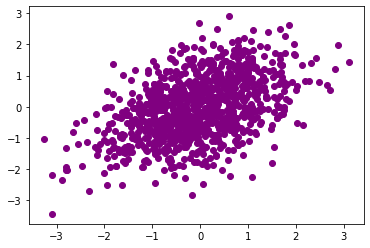

In [5]:
# plot datas
import matplotlib.pyplot as plt
a = samples_from_true_distribution[0]
b = samples_from_true_distribution[-1]
plt.scatter(a, b, color = 'purple')
plt.show()

<div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=25>
        Prior Sampling
    </font>
    </div>

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
الگوریتم نام‌برده شده را در این قسمت پیاده‌سازی کنید.
    </font>
    </div>

In [6]:
def prior_sampling(N):
    samples = []
    for i in range(N):
        samples.append(np.random.multivariate_normal(mean=[a_mean, b_mean], cov = joint_cov))
    return np.array(samples)

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
تابع پیاده‌سازی شده‌ی خود را با رسم نمودار راستی‌آزمایی کنید.
    </font>
    </div>

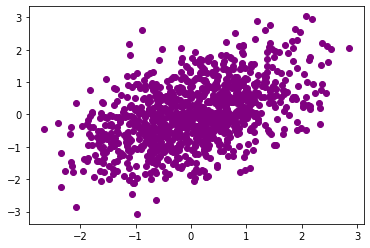

In [7]:
prior_outcome = prior_sampling(1000)
# plot datas
import matplotlib.pyplot as plt
a = (prior_outcome)[:,0]
b = (prior_outcome)[:,1]
plt.scatter(a, b, color = 'purple')
plt.show()

<div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=25>
        Gibbs Sampling
        </font>
    </div>

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
در این قسمت باید این الگوریتم را در دو قسمت پیاده‌سازی کنید؛ در قسمت اول باید تابع فاصله‌های شرطی که برای این الگوریت نیاز است را پیاده‌سازی کنید. همانطور که می‌دانید، نمونه برداری گیبس به توزیع‌های شرطی برای هر متغیر نیاز دارد. در قسمت زیر این توزیع‌ها را برای توزیع گوسی پیاده کنید
    </font>
    </div>

In [9]:
# it samples x|y
def get_conditional_dist(x_mean, y_mean, x_y_cov, sd_x, sd_y, var):
    s1 = np.sqrt(1.0 - x_y_cov ** 2) * sd_x
    s2 = np.sqrt(1.0 - x_y_cov ** 2) * sd_y
    if var == 'x':
        def dun(y):
            mx = x_mean + x_y_cov * (y - y_mean) * sd_x / sd_y
            x = np.random.normal(mx, s1, 1)
            return x
        return dun
    else:
        def dun(x):
            my = y_mean + x_y_cov * (x - x_mean) * sd_y / sd_x
            y = np.random.normal(my, s2, 1)
            return y
        return dun

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
خروجی تابع بالا را برای داده‌های موجود در متغیر زیر بریزید.
    </font>
    </div>

In [10]:
univariate_conditionals = [get_conditional_dist(a_mean, b_mean, a_b_cov, a_sigma, b_sigma, 'x'),
                           get_conditional_dist(a_mean, b_mean, a_b_cov, a_sigma, b_sigma, 'y')]

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
الگوریتم نمونه‌برداری گیبس را با شرایط توضیح داده شده و برای داده‌های موجود پیاده‌سازی کنید؛
    </font>
    </div>

In [11]:
def gibbs_sampling(univariate_conditionals, N):
    matrix = np.zeros((2,N))
    #first sample
    matrix[:,0] = [0,0]
    for i in range(0,N-1): 
        matrix[1,i] = univariate_conditionals[1](matrix[0,i])
        matrix[0,i+1] = univariate_conditionals[0](matrix[1,i-1])
    return matrix

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
تابع پیاده‌سازی شده‌ی خود را با رسم یک نمودار راستی‌آزمایی کنید.
    </font>
    </div>

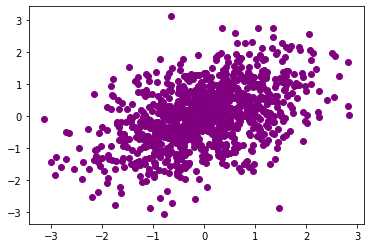

In [12]:
gibbs_outcome = gibbs_sampling(univariate_conditionals, 1000)
# plot datas
import matplotlib.pyplot as plt
a = gibbs_outcome[0]
b = gibbs_outcome[-1]
plt.scatter(a, b, color = 'purple')
plt.show()

<div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=25>
        Rejection Sampling
    </font>
    </div>

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
پیاده‌سازی این الگوریتم از الگوریتم گیبس ساده‌تر است. در قسمت تعیین شده، کد تابع این الگوریتم را پیاده‌سازی کنید. توجه کنید که اگر داده‌ها نیاز به نرمال‌سازی دارند، کد مربوط به این قسمت را هم در همین سل بنویسید.
    </font>
    </div>

In [14]:
import scipy.stats as st
def rejection_sampling(N):

    def p(x):
        return st.multivariate_normal.pdf(x, mean=[a_mean, b_mean], cov =  joint_cov)
    def q(x):
        return st.multivariate_normal.pdf(x, mean=[0,0], cov = [[1,0],[0,1]])
    
    x = np.arange(-5, 5)
    y = np.arange(-5, 5)
    o, e = np.meshgrid(x, y)
    d = np.array((o,e)).T
    d= d.reshape(d.shape[0]**2,2)
    k = max(p(d) / q(d))
    
    samples = []

    while len(samples) < N:
        z = np.random.multivariate_normal(mean=[0,0], cov = [[1,0],[0,1]])
        y_q = np.random.uniform(0, k * q(z))
        if y_q <= p(z) :
            samples.append(z)
    return np.array(samples)

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
تابع پیاده‌سازی شده‌ی خود را با رسم نمودار راستی‌آزمایی کنید.
    </font>
    </div>

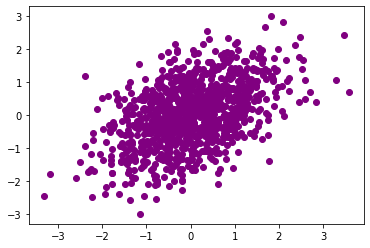

In [15]:
rejection_outcome = rejection_sampling(1000)
# plot datas
import matplotlib.pyplot as plt
a = (rejection_outcome)[:,0]
b = (rejection_outcome)[:,1]
plt.scatter(a, b, color = 'purple')
plt.show()

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
در این مرحله، تعدادی نقطه را با استفاده از الگوریتم‌های پیاده‌سازی شده نمونه‌برداری کنید و با توزیع اصلی مقایسه کنید. نمودار‌های مورد نیاز برای هر قسمت را سل زیر رسم کنید. نتیجه‌گیری خود را به طور مختصر و مستند در قسمت تعیین شده بنویسید.
    </font>
    </div>

In [38]:
# plot data

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
همانطور که میدانیم در prior sampling  با استتفاده از توابع کتابخانه‌ی numpy به تولید نمونه‌ها از توزیع مورد نظر پرداخته ایم و همانطور که مشخص است، نمودار تا حد زیادی به نمودار توزیع اصلی شبیه است.  در gibbs samling  ما پس از تعداد زیادی نمونه برداری به توزیع مورد نظر همگرا میشویم. شکل نمودار نیز مشخص است که تا حد زیادی به توزیع اصلی شبیه است اما با افزایش تعداد نمونه میتوان بیشتر به سمت شبیه شدن به توزیع اصلی حرکت کنیم. در rejection sampling در مقایسه با gibbs sampling ما باید زمان بیشتری به علت تولید نمونه‌های زاید صرف کنیم تا به نتیجه دلخواه برسیم.
    </font>
    </div>